Задача 3. Из начального приближения x0 = (1, 1) решить задачу безусловной минимизации функции f: R^2 -> R, f(x) = x1^2 + 2*x2^2 методом сопряженных градиентов.

В результате работы программы выдать количество сделанных итераций, найденное решение и последовательность {xk} на каждой итерации. Сделать визуализацию решения задачи.

Для критериев остановки возьмем точность omega = 10^(-10)

 Шаг 0:
   x_1=(4/9,-1/9)
 Шаг 1:
   x_2=(1.11022302462516E-16,-2.77555756156289E-17)

k >= n-1 -> 1 >= 1. Решение: x_2 = (1.11022302462516E-16,-2.77555756156289E-17)


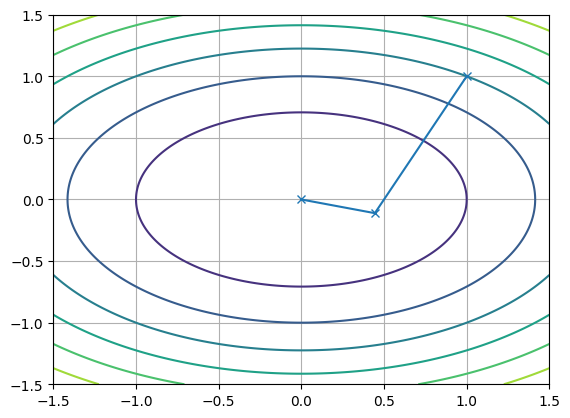

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

n = 2
x1, x2 = sp.symbols("x1 x2")
f = x1**2 + 2*x2**2
A = np.array([[f.coeff(x1**2), f.coeff(x1*x2)], [f.coeff(x1*x2), f.coeff(x2**2)]])
b = np.array([f.coeff(x1), f.coeff(x2)])
f_sym = sp.lambdify((x1, x2), f, "numpy")
df_sym = sp.lambdify((x1, x2), sp.derive_by_array(f, [x1, x2]), "numpy")

omega = 10**(-10)
x = np.array([[1, 1]])

alpha = np.array([])
beta = np.array([])
d = np.array([-df_sym(*x[0])])
for k in range(100):
    if (df_sym(*x[k]) <= np.array([omega, omega])).all():
        print("f'(x_k) ~= 0")
        break
    
    if k >= 1:
        A_d = A.dot(d[k-1])
        beta = np.append(beta, [0])
        beta[k-1] = A_d.dot(df_sym(*x[k]))/A_d.dot(d[k-1])
        d = np.append(d, [-df_sym(*x[k]) + beta[k-1]*d[k-1]], axis=0)
    
    alpha = np.append(alpha, -(np.dot(2*A.dot(x[k]) + b, d[k]) / (2*A.dot(d[k]).dot(d[k]))))
    x = np.append(x, [x[k] + alpha[k]*d[k]], axis=0)
    
    print(f" Шаг {k}:\n   x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
    
    if k >= n - 1:
        print(f"\nk >= n-1 -> {k} >= {n-1}. Решение: x_{k+1} = ({x[k+1][0]},{x[k+1][1]})")
        break

if k==99:
    print(f"Остановка по количеству итераций: 100 \n Последнее решение: x_{k+1} = ({x[k+1][0]},{x[k+1][1]})")

# Рисуем
space = np.linspace(-1.5, 1.5, 1000)
x1, x2 = np.meshgrid(space, space)

plt.contour(x1, x2, f_sym(x1, x2))
plt.plot(x.T[0], x.T[1], marker='x')
plt.grid()